# Pandas Rule Finder Examples

This notebook demonstrates how to use the pandas rule finder extension.

In [12]:
import sys
import numpy as np
from pathlib import Path

# Add parent directory to path so we can import the package
module_path = str(Path('.').absolute().parent)
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from pd_1d_rule_solver.pd_1d_rule_solver import RuleFinder  # This registers the extension automatically

# Load sample iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Look at the data
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Dataset shape: (150, 5)

Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## Example 1: Finding Rules for Numeric Targets

Let's find rules that maximize sepal length:

In [2]:
# Without visualization
# Example 1: Find rule for maximizing sepal length with default bins (12)
print("\nExample 1: Maximizing sepal length (default bins)")
result = df.findrule(
    target='sepal length (cm)',
    direction='maximize',
    variables=['petal length (cm)', 'petal width (cm)']
)
print(result)

# Example 2: Same analysis with more bins
print("\nExample 2: Same analysis with 20 bins")
result = df.findrule(
    target='sepal length (cm)',
    direction='maximize',
    variables=['petal length (cm)', 'petal width (cm)'],
    bins=20
)
print(result)

# Example 3: Find rule for predicting setosa species
print("\nExample 3: Predicting setosa species")
result = df.findrule(
    target='species',
    direction='setosa',
    variables=['sepal length (cm)', 'sepal width (cm)']
)
print(result)

# Access the metrics for the best rule
print("\nDetailed metrics for the best rule:")
print(f"Score: {result['metrics']['score']:.3f}")
print(f"Coverage: {result['metrics']['coverage']:.1%}")
print(f"Matching samples: {result['metrics']['matching_samples']}")


Example 1: Maximizing sepal length (default bins)
{'rule': {'petal length (cm)': (np.float64(4.3), np.float64(6.9))}, 'metrics': {'score': np.float64(0.2549019607843139), 'matching_median': np.float64(6.4), 'non_matching_median': np.float64(5.1), 'matching_mean': np.float64(6.472727272727272), 'non_matching_mean': np.float64(5.17945205479452), 'matching_std': np.float64(0.5888517737794917), 'non_matching_std': np.float64(0.42718682619538473), 'matching_samples': 77, 'total_samples': 150, 'coverage': 0.5133333333333333, 'cohens_d': np.float64(2.5140949530113748), 'matching_quartiles': {0.25: 6.1, 0.5: 6.4, 0.75: 6.8}, 'non_matching_quartiles': {0.25: 4.9, 0.5: 5.1, 0.75: 5.5}, 'matching_skew': np.float64(0.3080885990086034), 'matching_kurtosis': np.float64(0.279667940009654), 'matching_range': np.float64(3.0), 'matching_iqr': np.float64(0.7000000000000002), 'score_std': np.float64(0.019527084915858247), 'score_95ci': array([0.20754717, 0.28      ]), 'interval': (np.float64(4.3), np.flo

In [3]:
# Example 1: Find rule for maximizing sepal length with default bins (12)
print("\nExample 1: Maximizing sepal length (default bins)")
result = df.findrule(
    target='sepal length (cm)',
    direction='maximize',
    variables=['petal length (cm)', 'petal width (cm)'],
    visualize=True
)
print(result['visualization'])

# Example 2: Same analysis with more bins
print("\nExample 2: Same analysis with 20 bins")
result = df.findrule(
    target='sepal length (cm)',
    direction='maximize',
    variables=['petal length (cm)', 'petal width (cm)'],
    bins=20,
    visualize=True
)
print(result['visualization'])

# Example 3: Find rule for predicting setosa species
print("\nExample 3: Predicting setosa species")
result = df.findrule(
    target='species',
    direction='setosa',
    variables=['sepal length (cm)', 'sepal width (cm)'],
    visualize=True
)
print(result['visualization'])

# Access the metrics for the best rule
print("\nDetailed metrics for the best rule:")
print(f"Score: {result['metrics']['score']:.3f}")
print(f"Coverage: {result['metrics']['coverage']:.1%}")
print(f"Matching samples: {result['metrics']['matching_samples']}")


Example 1: Maximizing sepal length (default bins)
Rule Impact Analysis

Rule Conditions:
  petal length (cm): 4.300 to 6.900

Matching Samples: 77 (51.3% of data)

sepal length (cm) Distribution:
Original median: 5.80
Rule median: 6.40

     4.3 │░░░░░░░░                                                    
     4.6 │░░░░░░░░░░░░░░░░░░                                          
     4.9 │▓▓▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                  
     5.2 │▓▓▓░░░░░░░░░░░░░░░                                          
     5.5 │▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓░░░░░░░░░░░░░░░░░░░                         
     5.8 │▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓██████                           
     6.1 │▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓████████████████████████████
     6.4 │▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓███████████████████████              
     6.7 │▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓█████████████████████████          
     7.0 │▓▓▓▓▓▓▓▓▓▓██████████                                        
     7.3 │▓▓▓███                                    

## Example 2: Finding Rules for Categorical Targets

Now let's find rules that predict the 'setosa' species:

In [4]:
result = df.findrule(
    target='species',
    direction='setosa',
    variables=['sepal length (cm)', 'sepal width (cm)'],
    visualize=True
)

print(result['visualization'])

Rule Impact Analysis

Rule Conditions:
  sepal length (cm): 4.300 to 5.500

Matching Samples: 59 (39.3% of data)

species Distribution:

Matching samples:
setosa       | ███████████████      | 79.7%
versicolor   | ███                  | 18.6%
virginica    |                      | 1.7%

Non-matching samples:
virginica    | ██████████           | 53.8%
versicolor   | ████████             | 42.9%
setosa       |                      | 3.3%

Target class improvement: +76.4%
F1 Score: 0.862
Precision: 0.797
Recall: 0.940

Rule details:
{'sepal length (cm)': (np.float64(4.3), np.float64(5.5))}


In [14]:
df['setosa_ohe'] = pd.get_dummies(df, columns=['species'])['species_setosa'].astype(np.float64)

In [28]:
df['setosa_std_score'] = (df.setosa_ohe - df.setosa_ohe.mean()) / df.setosa_ohe.std()

In [32]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,setosa_ohe,setosa_std_score
0,5.1,3.5,1.4,0.2,setosa,1.0,1.409492
1,4.9,3.0,1.4,0.2,setosa,1.0,1.409492
2,4.7,3.2,1.3,0.2,setosa,1.0,1.409492
3,4.6,3.1,1.5,0.2,setosa,1.0,1.409492
4,5.0,3.6,1.4,0.2,setosa,1.0,1.409492
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0,-0.704746
146,6.3,2.5,5.0,1.9,virginica,0.0,-0.704746
147,6.5,3.0,5.2,2.0,virginica,0.0,-0.704746
148,6.2,3.4,5.4,2.3,virginica,0.0,-0.704746


In [33]:
pd.set_option('display.max_rows', 150)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,setosa_ohe,setosa_std_score
0,5.1,3.5,1.4,0.2,setosa,1.0,1.409492
1,4.9,3.0,1.4,0.2,setosa,1.0,1.409492
2,4.7,3.2,1.3,0.2,setosa,1.0,1.409492
3,4.6,3.1,1.5,0.2,setosa,1.0,1.409492
4,5.0,3.6,1.4,0.2,setosa,1.0,1.409492
5,5.4,3.9,1.7,0.4,setosa,1.0,1.409492
6,4.6,3.4,1.4,0.3,setosa,1.0,1.409492
7,5.0,3.4,1.5,0.2,setosa,1.0,1.409492
8,4.4,2.9,1.4,0.2,setosa,1.0,1.409492
9,4.9,3.1,1.5,0.1,setosa,1.0,1.409492


In [23]:
def score(filtered_df, df):
    std_outcomes = (df.setosa_ohe - df.setosa_ohe.mean()) / df.setosa_ohe.std()
    return std_outcomes[filtered_df.index].sum()

In [27]:
score(df[(df['petal width (cm)'] >= 0.1) & (df['petal width (cm)'] <= 0.6)], df)

np.float64(70.4745817062199)

In [37]:
# Sort by petal width and show the algorithm's work
df_sorted = df.sort_values('petal width (cm)').reset_index(drop=True)
df_sorted['std_score'] = (df_sorted.species.eq('setosa') - df_sorted.species.eq('setosa').mean()) / df_sorted.species.eq('setosa').std()

# Print first few and around the boundary
print("\nFirst few rows:")
print(df_sorted[['petal width (cm)', 'species', 'std_score']].head(10))
print("\nAround the boundary (0.6-1.0):")
print(df_sorted[df_sorted['petal width (cm)'].between(0.6, 1.0)][['petal width (cm)', 'species', 'std_score']])

# 2. Group by unique petal widths and sum standardized scores
grouped_scores = df_sorted.groupby('petal width (cm)')['std_score'].sum().reset_index()

print("Aggregated scores per unique value:")
print(grouped_scores)

# 3. These aggregated scores are what we should run Kadane's on
agg_scores = grouped_scores['std_score'].values


First few rows:
   petal width (cm) species  std_score
0               0.1  setosa   1.409492
1               0.1  setosa   1.409492
2               0.1  setosa   1.409492
3               0.1  setosa   1.409492
4               0.1  setosa   1.409492
5               0.2  setosa   1.409492
6               0.2  setosa   1.409492
7               0.2  setosa   1.409492
8               0.2  setosa   1.409492
9               0.2  setosa   1.409492

Around the boundary (0.6-1.0):
    petal width (cm)     species  std_score
49               0.6      setosa   1.409492
50               1.0  versicolor  -0.704746
51               1.0  versicolor  -0.704746
52               1.0  versicolor  -0.704746
53               1.0  versicolor  -0.704746
54               1.0  versicolor  -0.704746
55               1.0  versicolor  -0.704746
56               1.0  versicolor  -0.704746
Aggregated scores per unique value:
    petal width (cm)  std_score
0                0.1   7.047458
1                0.2  40.8

In [38]:
def calculate_f1_score(original_df, filtered_df, target_column, direction):
    """
    Calculate the F1 score for a given target column based on how well the filtered DataFrame 
    matches the specified direction compared to the original DataFrame.

    Args:
    original_df (pd.DataFrame): The original DataFrame containing all data points.
    filtered_df (pd.DataFrame): The DataFrame after applying the rule (filtered data points).
    target_column (str): The name of the column for which to calculate the F1 score.
    direction (str): The specific class or value to consider as positive for F1 score calculation.

    Returns:
    float: The F1 score for the given rule on the target column.
    """
    # Get the true labels from the original DataFrame
    y_true = (original_df[target_column] == direction).astype(int)
    
    # Create predictions where 1 indicates the sample is in the filtered DataFrame, 0 otherwise
    y_pred = pd.Series(index=original_df.index, data=0)
    y_pred.loc[filtered_df.index] = 1
    
    # Calculate true positives, false positives, and false negatives
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    
    # Compute precision and recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # Compute F1 Score
    if precision + recall == 0:
        return 0.0
    else:
        return 2 * (precision * recall) / (precision + recall)

# Example usage:
# Assuming df is your original DataFrame and df_filtered is your DataFrame after applying some rule
# df = pd.DataFrame(...)
# df_filtered = df[df['some_condition']]
# f1 = calculate_f1_score(df, df_filtered, 'species', 'setosa')dane's on
agg_scores = grouped_scores['std_score'].values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,setosa_ohe,setosa_std_score
0,5.1,3.5,1.4,0.2,setosa,1.0,1.409492
1,4.9,3.0,1.4,0.2,setosa,1.0,1.409492
2,4.7,3.2,1.3,0.2,setosa,1.0,1.409492
3,4.6,3.1,1.5,0.2,setosa,1.0,1.409492
4,5.0,3.6,1.4,0.2,setosa,1.0,1.409492
5,5.4,3.9,1.7,0.4,setosa,1.0,1.409492
6,4.6,3.4,1.4,0.3,setosa,1.0,1.409492
7,5.0,3.4,1.5,0.2,setosa,1.0,1.409492
8,4.4,2.9,1.4,0.2,setosa,1.0,1.409492
9,4.9,3.1,1.5,0.1,setosa,1.0,1.409492


In [42]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
window_size = 50

# Initialize lists to store results
f1_scores = []
std_score_sums = []

# Loop through the DataFrame with a sliding window of 50
for i in range(len(df) - window_size + 1):
    filtered_df = df.iloc[i:i + window_size]
    
    # Calculate F1 score for 'species' with direction 'setosa'
    y_true = df['species'] == 'setosa'
    y_pred = pd.Series(index=df.index, data=False)
    y_pred.loc[filtered_df.index] = True
    
    tp = (y_true & y_pred).sum()
    fp = (~y_true & y_pred).sum()
    fn = (y_true & ~y_pred).sum()
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    f1_scores.append(f1)
    
    # Calculate the sum of 'setosa_std_score' for this window
    std_score_sum = filtered_df['setosa_std_score'].sum()
    std_score_sums.append(std_score_sum)

# Create DataFrame with results
result_df = pd.DataFrame({
    'F1_Score': f1_scores,
    'Std_Score_Sum': std_score_sums
})

result_df.head()

,F1_Score,Std_Score_Sum
0,1.00,70.474582
1,0.98,68.360344
2,0.96,66.246107
3,0.94,64.131869
4,0.92,62.017632


In [45]:
norm_result_df = result_df.copy()

In [55]:
min_std_val = result_df['Std_Score_Sum'].min()
max_std_val = result_df['Std_Score_Sum'].max()
result_df['Normalized_Std_Score_Sum'] = 0.01 + (result_df['Std_Score_Sum'] - min_std_val) / (max_std_val - min_std_val)

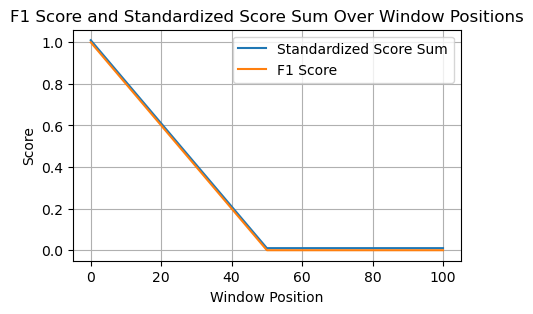

In [56]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(5, 3))
plt.plot(result_df.index, result_df['Normalized_Std_Score_Sum'], label='Standardized Score Sum')
plt.plot(result_df.index, result_df['F1_Score'], label='F1 Score')

plt.xlabel('Window Position')
plt.ylabel('Score')
plt.title('F1 Score and Standardized Score Sum Over Sliding Window Positions')
plt.legend()

# Optionally, add grid lines for better readability
plt.grid(True)

plt.show()